# 密度图与等高线图

有时在二维图上用等高线图或者彩色图来表示三维数据是个不错的方法。  
`Matplotlib` 提供了三个函数来解决这个问题：
- 用 `plt.contour` 画等高线图
- 用 `plt.contourf` 画带有填充色的等高线图（`filled contour plot`）的色彩
- 用 `plt.imshow` 显示图形

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## 1. 三维函数的可视化

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)  # 用函数 z = f (x, y) 演示一个等高线图

等高线图可以用 `plt.contour` 函数来创建。它需要三个参数：`x` 轴、`y` 轴、`z` 轴三个坐标轴的网格数据。  
`x` 轴与 `y` 轴表示图形中的位置，而 `z` 轴将通过等高线的等级来表示。  
用 `np.meshgrid` 函数来准备这些数据可能是最简单的方法，它可以从一维数组构建二维网格数据：

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

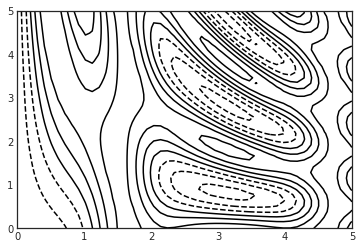

In [4]:
plt.contour(X, Y, Z, colors='black')

需要注意的是，当图形中只使用一种颜色时，默认使用虚线表示负数，使用实线表示正数。  
另外，你可以用 `cmap` 参数设置一个线条配色方案来自定义颜色。还可以让更多的线条显示不同的颜色——可以将数据范围等分为 20 份，然后用不同的颜色表示：

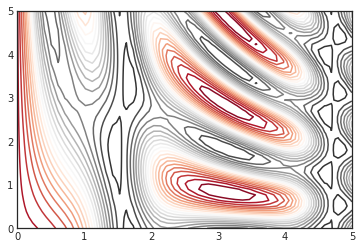

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy')  # 使用 RdGy（红 - 灰，Red-Gray 的缩写）配色方案，这对于数据集中度的显示效果比较好

In [6]:
# plt.cm.<TAB>  # Matplotlib 有非常丰富的配色方案，你可以在 IPython 里用 Tab 键浏览 plt.cm 模块对应的信息

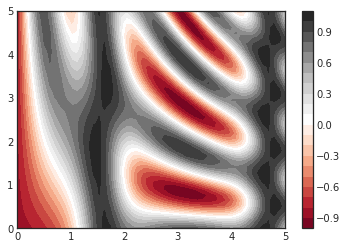

In [7]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')  # 通过 plt.contourf() 函数来填充等高线图
plt.colorbar()                          # 通过 plt.colorbar() 命令自动创建一个表示图形各种颜色对应标签信息的颜色条

通过颜色条可以清晰地看出，黑色区域是“波峰”（`peak`），红色区域是“波谷”（`valley`）。

但是图形还有一点不尽如人意的地方，就是看起来有点儿“污渍斑斑”，不是那么干净。这是由于颜色的改变是一个离散而非连续的过程，这并不是我们想要的效果。  
你当然可以通过将等高线的数量设置得非常多来解决这个问题，但是最终获得的图形性能会很不好，因为 `Matplotlib` 必须渲染每一级的等高线。  
其实有更好的做法，那就是通过 `plt.imshow()` 函数来处理，它可以将二维数组渲染成渐变图。

TypeError: axis() got an unexpected keyword argument 'aspect'

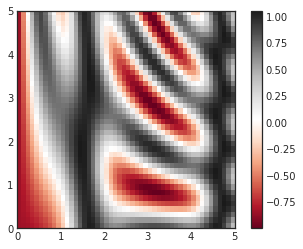

In [8]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')  # axis() got an unexpected keyword argument 'aspect'

但是，使用 `imshow()` 函数时有一些注意事项。
- `plt.imshow()` 不支持用 `x` 轴和 `y` 轴数据设置网格，而是必须通过 `extent` 参数设置图形的坐标范围 `[xmin, xmax, ymin, ymax]`。
- `plt.imshow()` 默认使用标准的图形数组定义，就是原点位于左上角（浏览器都是如此），而不是绝大多数等高线图中使用的左下角。这一点在显示网格数据图形的时候必须调整。
- `plt.imshow()` 会自动调整坐标轴的精度以适应数据显示。你可以通过 `plt.axis(aspect='image')` 来设置 `x` 轴与 `y` 轴的单位。

最后还有一个可能会用到的方法，就是将等高线图与彩色图组合起来。  
例如，如果我们想创建如下图的效果，就需要用一幅背景色半透明的彩色图（可以通过 `alpha` 参数设置透明度），与另一幅坐标轴相同、带数据标签的等高线图叠放在一起（用 `plt.clabel()` 函数实现）：

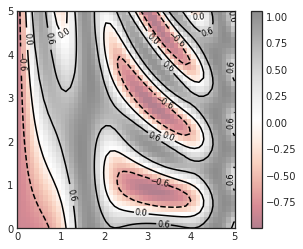

In [9]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar()

将 `plt.contour`、`plt.contourf` 与 `plt.imshow` 这三个函数组合起来之后，就打开了用二维图画三维数据的无尽可能。